C:\Users\user\AppData\Local\Temp\ipykernel_23252\1574527271.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Used_Discount'] = X['Used_Discount'].astype(int)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Логістична регресія:
Точність: 0.7763
Прецизійність: 0.7694
Відкликання: 0.7763
Показник F1: 0.7676

Дерево рішень:
Точність: 0.7808
Прецизійність: 0.7774
Відкликання: 0.7808
Показник F1: 0.7783

Випадковий ліс:
Точність: 0.7808
Прецизійність: 0.7832
Відкликання: 0.7808
Показник F1: 0.7816


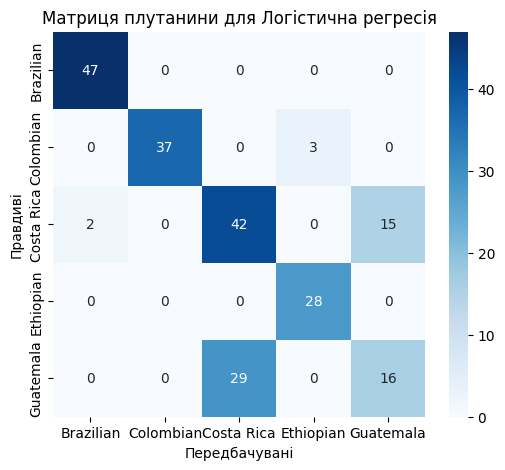

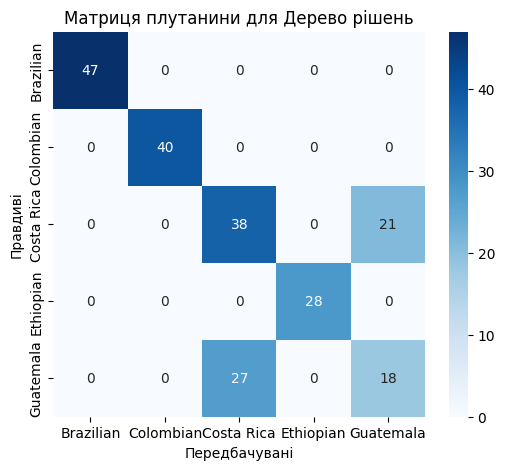

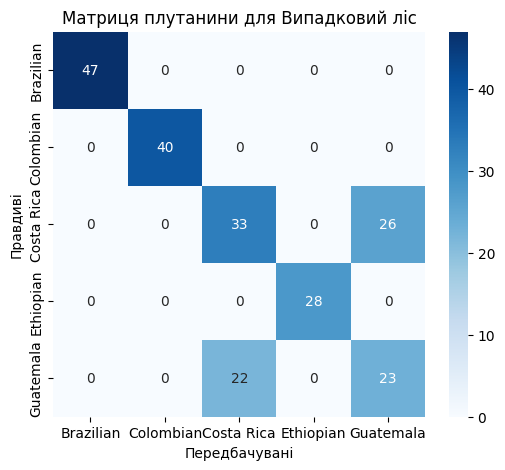


F-beta для Логістичної регресії:
F1 (beta=1): 0.7728
F2 (beta=2): 0.7749
F0.5 (beta=0.5): 0.7708

F-beta для Дерева рішень:
F1 (beta=1): 0.7791
F2 (beta=2): 0.7801
F0.5 (beta=0.5): 0.7781

F-beta для Випадкового лісу:
F1 (beta=1): 0.7820
F2 (beta=2): 0.7813
F0.5 (beta=0.5): 0.7827
Ймовірності передбачень для Логістичної регресії (перші 5):
[[2.64211010e-18 2.08791257e-02 9.35006361e-08 9.79120653e-01
  1.27466312e-07]
 [1.67864482e-05 1.03235408e-03 5.50839901e-01 2.35408891e-13
  4.48110958e-01]
 [3.48883156e-02 4.87977122e-02 4.62217612e-01 1.92338815e-05
  4.54077127e-01]
 [9.99999695e-01 6.89176569e-20 2.14726288e-07 7.18083098e-42
  8.99759134e-08]
 [5.26517173e-02 6.62822118e-02 4.39854855e-01 9.33731726e-05
  4.41117842e-01]]

Ймовірності передбачень для Дерева рішень (перші 5):
[[0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]

Ймовірності передбачень для Випадкового лісу (перші 5):
[[0.         0.01       0.         0.99       0.      

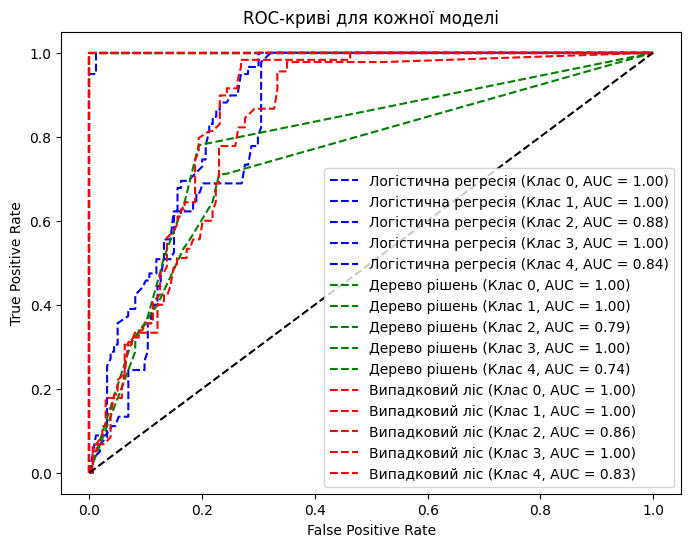

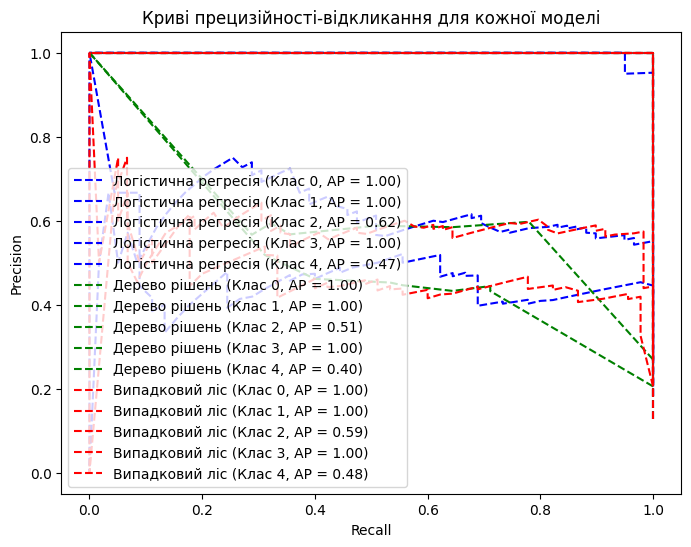

C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\us

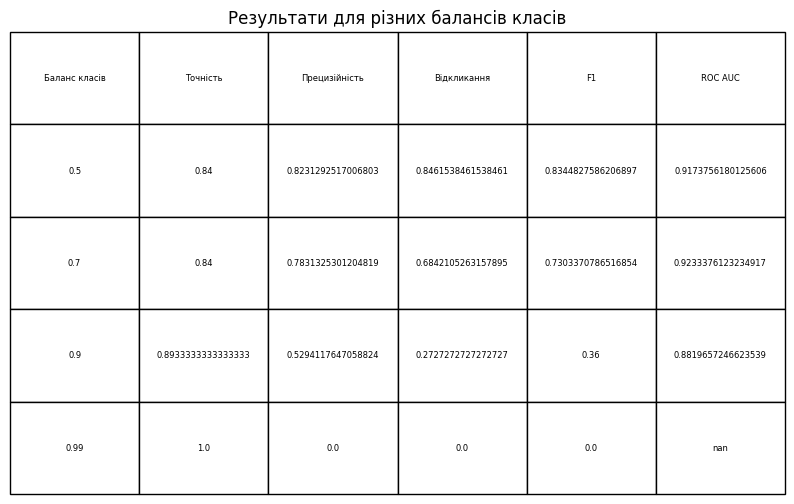

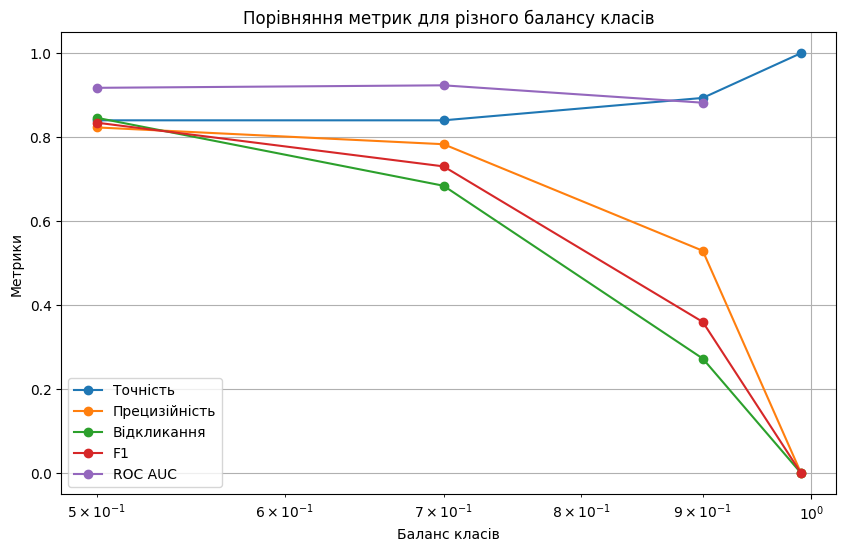

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.datasets import make_classification


df = pd.read_csv("DatasetForCoffeeSales2.csv", encoding="latin1")

numeric_cols = ['Unit Price','Quantity','Sales Amount','Discount_Amount','Final Sales']

label_encoder = LabelEncoder()
scaler = StandardScaler()

df_copy = df.copy();

df_copy['Product_Label'] = label_encoder.fit_transform(df_copy['Product'])

X = df_copy[['Unit Price', 'Quantity', 'Sales Amount', 'Used_Discount', 'Discount_Amount']]
X['Used_Discount'] = X['Used_Discount'].astype(int)  
y = df_copy['Product_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Створіть три різні моделі класифікації (наприклад, логістична регресія, дерево рішень, випадковий ліс).
log_reg_model = LogisticRegression(max_iter=500)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)

# Для кожної моделі обчисліть:
# Точність (Accuracy)
# Прецизійність (Precision) (для кожного класу та середньозважене)
# Відкликання (Recall) (для кожного класу та середньозважене)
# Показник F1 (F1 score) (для кожного класу та середньозважене)

# Оцінка моделі логістичної регресії
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg, average=None)
recall_log_reg = recall_score(y_test, y_pred_log_reg, average=None)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average=None)
precision_log_reg_weighted = precision_score(y_test, y_pred_log_reg, average='weighted')
recall_log_reg_weighted = recall_score(y_test, y_pred_log_reg, average='weighted')
f1_log_reg_weighted = f1_score(y_test, y_pred_log_reg, average='weighted')

# Виведення результатів для Логістичної регресії
print("Логістична регресія:")
print(f"Точність: {accuracy_log_reg:.4f}")
print(f"Прецизійність: {precision_log_reg_weighted:.4f}")
print(f"Відкликання: {recall_log_reg_weighted:.4f}")
print(f"Показник F1: {f1_log_reg_weighted:.4f}")

# Оцінка моделі дерева рішень
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average=None)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average=None)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average=None)
precision_decision_tree_weighted = precision_score(y_test, y_pred_decision_tree, average='weighted')
recall_decision_tree_weighted = recall_score(y_test, y_pred_decision_tree, average='weighted')
f1_decision_tree_weighted = f1_score(y_test, y_pred_decision_tree, average='weighted')

# Виведення результатів для Дерева рішень
print("\nДерево рішень:")
print(f"Точність: {accuracy_decision_tree:.4f}")
print(f"Прецизійність: {precision_decision_tree_weighted:.4f}")
print(f"Відкликання: {recall_decision_tree_weighted:.4f}")
print(f"Показник F1: {f1_decision_tree_weighted:.4f}")

# Оцінка моделі випадкового лісу
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest, average=None)
recall_random_forest = recall_score(y_test, y_pred_random_forest, average=None)
f1_random_forest = f1_score(y_test, y_pred_random_forest, average=None)
precision_random_forest_weighted = precision_score(y_test, y_pred_random_forest, average='weighted')
recall_random_forest_weighted = recall_score(y_test, y_pred_random_forest, average='weighted')
f1_random_forest_weighted = f1_score(y_test, y_pred_random_forest, average='weighted')

# Виведення результатів для Випадкового лісу
print("\nВипадковий ліс:")
print(f"Точність: {accuracy_random_forest:.4f}")
print(f"Прецизійність: {precision_random_forest_weighted:.4f}")
print(f"Відкликання: {recall_random_forest_weighted:.4f}")
print(f"Показник F1: {f1_random_forest_weighted:.4f}")

# Створіть і проаналізуйте матриці плутанини:
# Які типи помилок найчастіше допускає кожна модель?
# Чи є класи, які складніше передбачити?
models = [("Логістична регресія", y_pred_log_reg), 
          ("Дерево рішень", y_pred_decision_tree), 
          ("Випадковий ліс", y_pred_random_forest)]

for model_name, y_pred in models:
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Матриця плутанини для {model_name}')
    plt.ylabel('Правдиві')
    plt.xlabel('Передбачувані')
    plt.show()

# Реалізуйте показник F-beta:
def f_beta_score(y_true, y_pred, beta=1):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    fbeta = (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)
    return fbeta

# Логістична регресія
f_beta_log_reg_1 = f_beta_score(y_test, y_pred_log_reg, beta=1)  # F1 (beta=1)
f_beta_log_reg_2 = f_beta_score(y_test, y_pred_log_reg, beta=2)  # F2 (beta=2)
f_beta_log_reg_05 = f_beta_score(y_test, y_pred_log_reg, beta=0.5)  # F0.5 (beta=0.5)

# Дерево рішень
f_beta_decision_tree_1 = f_beta_score(y_test, y_pred_decision_tree, beta=1)
f_beta_decision_tree_2 = f_beta_score(y_test, y_pred_decision_tree, beta=2)
f_beta_decision_tree_05 = f_beta_score(y_test, y_pred_decision_tree, beta=0.5)

# Випадковий ліс
f_beta_random_forest_1 = f_beta_score(y_test, y_pred_random_forest, beta=1)
f_beta_random_forest_2 = f_beta_score(y_test, y_pred_random_forest, beta=2)
f_beta_random_forest_05 = f_beta_score(y_test, y_pred_random_forest, beta=0.5)

# Виведення результатів F-beta
# Порівняйте моделі за F1 (beta=1), F2(beta=2) та F0.5 (beta=0.5).
# Як зміна beta впливає на те, яка модель виглядає найкращою?
# Коли краще використовувати F2 замість F1? Коли F0.5 є доречнішим?
print("\nF-beta для Логістичної регресії:")
print(f"F1 (beta=1): {f_beta_log_reg_1:.4f}")
print(f"F2 (beta=2): {f_beta_log_reg_2:.4f}")
print(f"F0.5 (beta=0.5): {f_beta_log_reg_05:.4f}")

print("\nF-beta для Дерева рішень:")
print(f"F1 (beta=1): {f_beta_decision_tree_1:.4f}")
print(f"F2 (beta=2): {f_beta_decision_tree_2:.4f}")
print(f"F0.5 (beta=0.5): {f_beta_decision_tree_05:.4f}")

print("\nF-beta для Випадкового лісу:")
print(f"F1 (beta=1): {f_beta_random_forest_1:.4f}")
print(f"F2 (beta=2): {f_beta_random_forest_2:.4f}")
print(f"F0.5 (beta=0.5): {f_beta_random_forest_05:.4f}")

# Згенеруйте ймовірності передбачень для тестового набору для кожної моделі.
y_proba_log_reg = log_reg_model.predict_proba(X_test)
y_proba_decision_tree = decision_tree_model.predict_proba(X_test)
y_proba_random_forest = random_forest_model.predict_proba(X_test)

print("Ймовірності передбачень для Логістичної регресії (перші 5):")
print(y_proba_log_reg[:5])

print("\nЙмовірності передбачень для Дерева рішень (перші 5):")
print(y_proba_decision_tree[:5])

print("\nЙмовірності передбачень для Випадкового лісу (перші 5):")
print(y_proba_random_forest[:5])

# Обчисліть і побудуйте ROC-криві:
# Обчисліть ROC AUC для кожної моделі.
# Побудуйте ROC-криві для всіх моделей на одному графіку.
# Визначте, яка модель має найкращу роздільну здатність.

# Обчислюємо ROC-криві та AUC-ROC
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Обчислюємо ROC-криві та AUC-ROC для кожного класу
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
models = [(y_proba_log_reg, "Логістична регресія"),
          (y_proba_decision_tree, "Дерево рішень"),
          (y_proba_random_forest, "Випадковий ліс")]

for idx, (y_proba, label) in enumerate(models):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=colors[idx], linestyle='--',
                 label=f'{label} (Клас {i}, AUC = {roc_auc[i]:.2f})')

# Діагональ випадкового вгадування
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-криві для кожної моделі')
plt.legend()
plt.show()

# Для бінарної класифікації:
# Побудуйте криві прецизійності-відкликання.
# Обчисліть площу під кривою прецизійності-відкликання.
# Порівняйте з ROC AUC. Чи різняться рейтинги моделей? Чому?
plt.figure(figsize=(8, 6))
for idx, (y_proba, label) in enumerate(models):
    precision = dict()
    recall = dict()
    pr_auc = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_proba[:, i])
        pr_auc[i] = average_precision_score(y_test_binarized[:, i], y_proba[:, i])
        plt.plot(recall[i], precision[i], color=colors[idx], linestyle='--',
                 label=f'{label} (Клас {i}, AP = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Криві прецизійності-відкликання для кожної моделі')
plt.legend()
plt.show()

# Експеримент із дисбалансом класів:
# Створіть синтетичні набори даних із різним балансом класів (50-50, 70-30, 90-10, 99-1).
# Застосуйте найкращу модель до кожного набору.
# Обчисліть точність, прецизійність, відкликання, F1 та ROC AUC.
# Проаналізуйте, як дисбаланс впливає на метрики. Які з них найстійкіші?

# Функція для створення синтетичних наборів даних
def create_dataset(class_balance):
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=10,
                                 n_redundant=5, n_classes=2, weights=[class_balance, 1 - class_balance],
                                 flip_y=0, random_state=42)
    return X, y

# Функція для обчислення метрик
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    return accuracy, precision, recall, f1, roc_auc

# Різні пропорції класів
class_balances = [0.5, 0.7, 0.9, 0.99]
results = []

# Для кожного набору даних із різним балансом класів
for balance in class_balances:
    # Створення набору даних
    X, y = create_dataset(balance)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Навчання моделі
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    
    # Обчислення метрик
    accuracy, precision, recall, f1, roc_auc = evaluate_model(model, X_test, y_test)
    
    results.append((balance, accuracy, precision, recall, f1, roc_auc))

# Виведення результатів
results_df = pd.DataFrame(results, columns=["Баланс класів", "Точність", "Прецизійність", "Відкликання", "F1", "ROC AUC"])

fig, ax = plt.subplots(figsize=(10, 6)) 
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=results_df.values, colLabels=results_df.columns, loc='center', cellLoc='center', bbox=[0, 0, 1, 1])

plt.title('Результати для різних балансів класів')
plt.show()

# Побудова графіків для порівняння метрик
balances, accuracies, precisions, recalls, f1s, roc_aucs = zip(*results)

plt.figure(figsize=(10, 6))
plt.plot(balances, accuracies, label='Точність', marker='o')
plt.plot(balances, precisions, label='Прецизійність', marker='o')
plt.plot(balances, recalls, label='Відкликання', marker='o')
plt.plot(balances, f1s, label='F1', marker='o')
plt.plot(balances, roc_aucs, label='ROC AUC', marker='o')

plt.xlabel('Баланс класів')
plt.ylabel('Метрики')
plt.title('Порівняння метрик для різного балансу класів')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.show()

In [ ]:
# Метою цього дослідження є побудова та порівняння різних моделей класифікації (логістичної регресії, дерева рішень та випадкового лісу) для прогнозування категорії кавового продукту на основі продажних характеристик, таких як ціна, кількість, обсяг знижки

# При β=2 (наголос на Recall) перевагу має модель, яка вміє знаходити всі позитивні класи.

# При β=0.5 (наголос на Precision) кращою стає модель, яка дає найменше хибнопозитивних.